In [1]:
import random
import pandas  as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
class CqkProblem:
    def __init__(self, r, n, d, a, b, low, up):
        self.n = n
        self.r = r
        self.d = list(d)
        self.a = list(a)
        self.b = list(b)
        self.low = list(low)
        self.up = list(up)

In [3]:

def generate_cqk_problem(n):
    d = []
    low = []
    up = []
    b = []
    a = []
    temp = 0
    lb = 0.0
    ub = 0.0
    lower = 10
    upper = 25
    r = 0

    for i in range(n):
        
        b.append(10 + 14*random.random())
        low.append(1 + 14*random.random())
        up.append(1 + 14*random.random())
        if low[i] > up[i]:
            temp = low[i]
            low[i] = up[i]
            up[i] = temp
        
        lb = lb + b[i]*low[i];
        ub = ub + b[i]*up[i];
        
        #Uncorrelated
        d.append(random.randint(10,25))
        a.append(random.randint(10,25))
        
    r = lb + (ub - lb)*0.7;
    
    return CqkProblem( r, n, d, a, b, low, up)
    

In [4]:

def initial_lambda(p, lamb):
    s0=0.0
    q0=0.0
    slopes = []
    for i in range(p.n):
        slopes.append((p.b[i]/p.d[i])*p.b[i])
        s0 = s0 + (p.a[i] * p.b[i]) / p.d[i]
        q0 = q0 + (p.b[i] * p.b[i]) / p.d[i]
    lamb = (p.r-s0)/q0
    return lamb, slopes

In [5]:
def phi_lambda(p,lamb,phi,deriv,slopes,r):
    deriv = 0.0
    phi = r * -1
    x = []
    
    for i in range(p.n):
        
        x.append( (p.b[i] * lamb + p.a[i])/p.d[i])

        if x[i] < p.low[i]:
            x[i] = p.low[i]
        elif x[i] > p.up[i]:
            x[i] = p.up[i]
        else:
            deriv = deriv + slopes[i];
        phi = phi + p.b[i] * x[i];
    return deriv, phi, x

In [24]:
MAX_IT = 20
INFINITO_NEGATIVO = -999999999;
INFINITO_POSITIVO = 999999999;
def newton(p):
    phi = 0
    lamb = 0
    alfa = INFINITO_NEGATIVO;
    beta = INFINITO_POSITIVO;
    phi_alfa = 0.0;
    phi_beta = 0.0;
    deriv = 0
    x = []
    r = p.r
    
    lamb, slopes = initial_lambda(p,lamb)

    deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)
    it = 1
    while phi != 0.0 and it <= MAX_IT:
        if phi > 0:
            beta = lamb
            lambda_n = 0.0
            if deriv > 0.0:
                
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                if lambda_n > alfa:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_beta = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
#             if deriv == 0.0:
#                 lamb = breakpoint_to_the_left(p,lamb);
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
                
        else:
            alfa = lamb;
            lambda_n = 0.0;

            if deriv > 0.0:
                lambda_n = lamb - (phi/deriv)
                if abs(lambda_n - lamb) <= 0.00000000001:
                    phi = 0.0
                    break
                
                if lambda_n < beta:
                    lamb = lambda_n
                else:
                    print("aqui")
                    phi_alfa = phi;
#                     lamb = secant(p,x,alfa,beta,phi_alfa,phi_beta,r);
            if deriv == 0.0:
                print("aqui 2")
#                 lamb = breakpoint_to_the_right(p,lamb)
#                 if lamb <= INFINITO_NEGATIVO or lamb >= INFINITO_POSITIVO:
#                     break
        
        
        deriv, phi, x = phi_lambda(p,lamb,phi,deriv,slopes,r)

        it = it + 1
        
    if phi == 0.0:
        return it, x, slopes
    elif alfa == beta:
        return -1
    else:
        return -2
    

In [43]:
n = 10
list_x = []
for i in range(10):
    p = generate_cqk_problem(n)
    it, x, slopes = newton(p)
    list_div = []
    for i in range(10):
        list_div.append((p.b[i] + p.a[i])/p.d[i])
    list_x.append(x)

In [44]:

t = np.arange(0, 10, 1).tolist()
df = pd.DataFrame (list_x, columns = ['1','2','3','4','5','6','7','8','9','10'])

In [45]:
df

,1,2,3,4,5,6,7,8,9,10
0,12.890980,7.114443,9.370237,11.514081,5.767566,12.607818,10.113268,12.073550,11.034311,4.469944
1,11.850911,11.742469,10.686104,9.410988,8.531308,12.921831,14.781894,9.565554,11.453980,7.741900
2,7.516321,7.618603,12.478473,4.627089,7.003356,4.576984,8.701290,8.003410,6.328525,4.514882
3,10.209544,6.623857,10.177178,10.769197,3.458061,8.771906,8.811150,3.600926,8.791767,8.147917
4,9.901803,8.162419,12.115839,6.766013,11.537510,2.297562,8.257096,6.711077,10.996101,4.726068
5,8.321049,3.867865,7.203124,4.038858,6.433403,7.313227,8.818904,11.023167,8.998670,6.139145
6,13.144489,5.082844,6.825877,7.391026,9.162638,11.774662,9.063209,3.351691,5.994910,8.754901
7,9.913673,9.662145,6.942649,8.249161,11.403610,11.729249,12.143996,13.065741,9.272385,9.953474
8,10.410968,11.165145,8.121475,13.184218,7.928643,9.078508,10.659370,6.915206,13.821915,10.132866
9,12.473636,9.020900,7.427868,6.060490,4.616109,10.428627,7.301765,10.051771,5.391328,7.823240


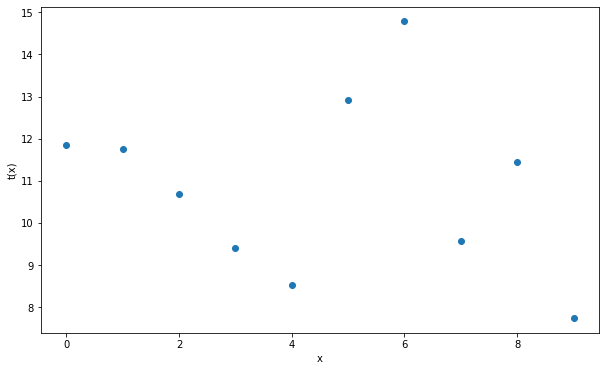

In [46]:
t = DataFrame(data,columns=['t'])
x = DataFrame(list_x[1],columns=['x'])

plt.figure(figsize=(10,6))
plt.scatter(t,x)
plt.xlabel('x')
plt.ylabel('t(x)')
plt.show()

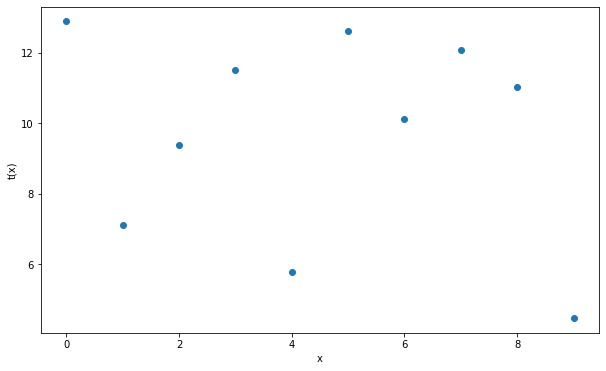

In [47]:
t = DataFrame(data,columns=['t'])
x = DataFrame(list_x[0],columns=['x'])

plt.figure(figsize=(10,6))
plt.scatter(t,x)
plt.xlabel('x')
plt.ylabel('t(x)')
plt.show()

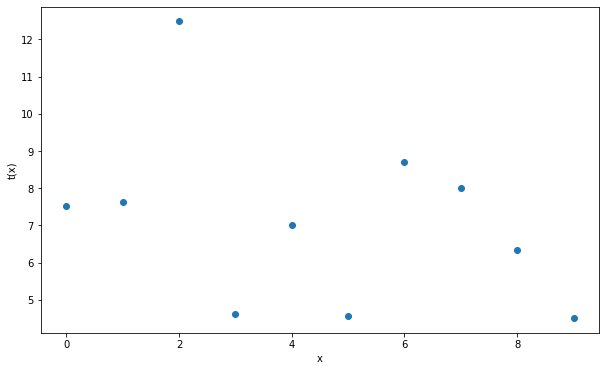

In [48]:
t = DataFrame(data,columns=['t'])
x = DataFrame(list_x[2],columns=['x'])

plt.figure(figsize=(10,6))
plt.scatter(t,x)
plt.xlabel('x')
plt.ylabel('t(x)')
plt.show()

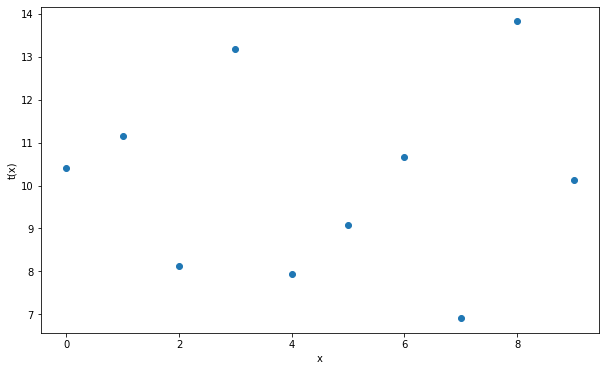

In [51]:
t = DataFrame(data,columns=['t'])
x = DataFrame(list_x[8],columns=['x'])

plt.figure(figsize=(10,6))
plt.scatter(t,x)
plt.xlabel('x')
plt.ylabel('t(x)')
plt.show()